In [1]:
import pandas as pd
import numpy as np
 
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


In [2]:
df_train = pd.read_csv("train.csv")
df_train.shape

(891, 12)

In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train.shape

(891, 12)

In [14]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [16]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [ ]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [20]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [21]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [24]:
df_train_dummied = pd.get_dummies(df_train,columns=["Sex"])

In [ ]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [28]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


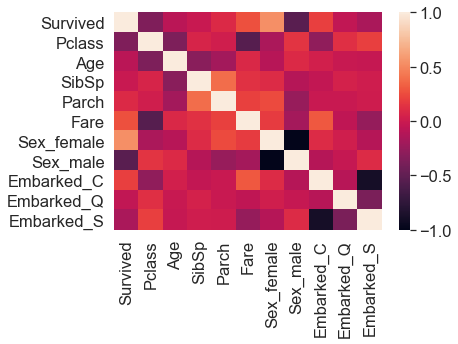

In [30]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [32]:
used_features = ["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

x = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(498, 9)
(214, 9)
(498,)
(214,)


In [38]:
LogReg = LogisticRegression()

In [40]:
LogReg.fit(x_train,y_train)

C:\Users\Roshi\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [43]:
y_pred = LogReg.predict(x_test)

In [44]:
metrics.confusion_matrix(y_test,y_pred)

array([[102,  24],
       [ 22,  66]], dtype=int64)

In [46]:
metrics.accuracy_score(y_test,y_pred)

0.7850467289719626

In [47]:
len(x_test)

214

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       126
           1       0.73      0.75      0.74        88

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [49]:
LogReg.coef_

array([[-1.18257184, -0.04542259, -0.35993157, -0.05333808,  1.29152665,
        -1.28979156,  0.29298624, -0.36843889,  0.07718774]])

In [50]:
LogReg.intercept_

array([3.9741279])

In [51]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [52]:
LogReg.predict_proba(x_test)

array([[0.03150511, 0.96849489],
       [0.55179692, 0.44820308],
       [0.8867559 , 0.1132441 ],
       [0.09996179, 0.90003821],
       [0.17317114, 0.82682886],
       [0.8721576 , 0.1278424 ],
       [0.31091829, 0.68908171],
       [0.23082528, 0.76917472],
       [0.87233415, 0.12766585],
       [0.66680324, 0.33319676],
       [0.82773941, 0.17226059],
       [0.61459028, 0.38540972],
       [0.83254856, 0.16745144],
       [0.89123772, 0.10876228],
       [0.75251391, 0.24748609],
       [0.93666813, 0.06333187],
       [0.90375962, 0.09624038],
       [0.88211382, 0.11788618],
       [0.9034592 , 0.0965408 ],
       [0.94887742, 0.05112258],
       [0.67894212, 0.32105788],
       [0.20710166, 0.79289834],
       [0.93947387, 0.06052613],
       [0.90375962, 0.09624038],
       [0.84483383, 0.15516617],
       [0.25692091, 0.74307909],
       [0.86718944, 0.13281056],
       [0.61551343, 0.38448657],
       [0.31091829, 0.68908171],
       [0.65663612, 0.34336388],
       [0.